# Projet 2 : Estimateur par projection

### M2 - MAA - Statistiques Grande Dimension
### Virgile AMATO - Alexandre CHEVAUX

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1)

1)

a)

In [8]:
n = 100
X = np.random.uniform(0, 1, n)

Voici l'histogramme du vecteur X généré : 

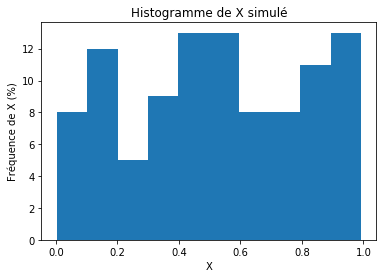

In [9]:
plt.figure()
plt.hist(X)
plt.title("Histogramme de X simulé")
plt.xlabel("X")
plt.ylabel("Fréquence de X (%)")
plt.show()

b) On simule n variables aléatoires selon la fonction Y tel que
$$ Y_i= f(X_i) +\sigma\xi_i $$
$$\text{avec }\xi_i \sim \mathscr{N}(0,1) \text{et } X_i  \sim \mathbb{U}[0,1]$$
$$\text{on pose } \sigma=0,2$$

In [10]:
def f(x):
    return (np.power(x, 2) * np.power(2, x-1) - np.power(x - 0.5, 3)) * np.sin(10*x)

eps = np.random.normal(0, 1, n)
sigma = 0.2

Y = [f(x) + sigma * eps[i_x] for i_x, x in enumerate(X)]

Voici l'histogramme du vecteur Y généré :

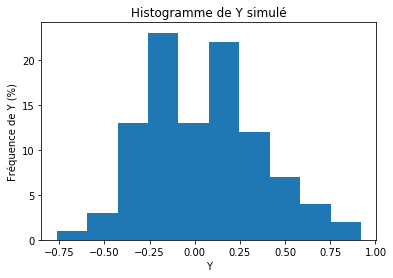

In [11]:
plt.figure()
plt.hist(Y)
plt.title("Histogramme de Y simulé")
plt.xlabel("Y")
plt.ylabel("Fréquence de Y (%)")
plt.show()

2)

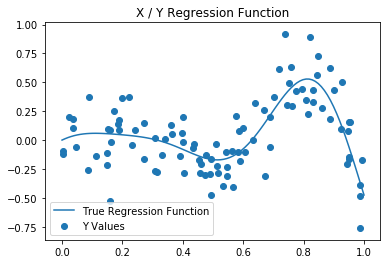

In [12]:
f_graph = [f(i_x) for i_x in np.linspace(0, 1, n)]

plt.figure()
plt.title("X / Y Regression Function")
plt.scatter(X, Y)
plt.plot(np.linspace(0, 1, n), f_graph)
plt.legend([
    "True Regression Function",
    "Y Values"
], loc="lower left")
plt.show()

3)

a)On rappelle que la base de Fourier utilisée est tel que:
$$\phi(1)=1 $$
$$\phi_{2k}(x)=cos(2\pi kx)$$
$$\phi_{2k+1}(x)=sin(2\pi kx)$$

In [13]:
def base_fourier(n, x):
    if n == 1:
        return 1
    elif n%2 == 0:
        k = n/2
        return np.cos(2 * np.pi * k * x)
    else:
        k = (n-1)/2
        return np.sin(2 * np.pi * k * x)


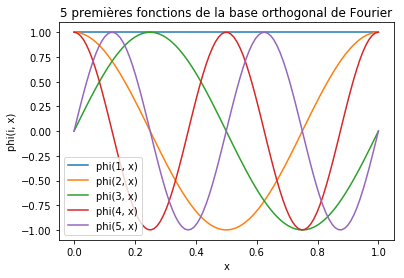

In [14]:

plt.figure()
plt.title("5 premières fonctions de la base orthogonal de Fourier")
plt.xlabel("x")
plt.ylabel("phi(i, x)")
legend_list = []
for i in range(1, 6):
    phi = []
    for x in np.linspace(0, 1, 100):
        phi.append(base_fourier(i, x))
    plt.plot(np.linspace(0, 1, 100), phi)
    legend_list.append("phi(" + str(i) + ", x)")
plt.legend(legend_list, loc="lower left")
plt.show()

b)
Estimateur par projection:
$$\hat{f}(x) = \sum_{i=1}^{N} \hat{\Theta_j}\phi_j(x))$$
$$\text{où } \hat{\Theta_j}=\frac{1}{n}*\sum_{i=1}^{n}Y_i*\phi_j(X_i) $$
$$\text{où } Y_i=f(X_i)+ \xi_i $$

Afin de rendre plus clair l'exécution du code, nous avons construit la classe "orthogonal_projection_regression" dont les 4 méthodes sont:
 * le constructeur
 * fit : qui calcul les theta de notre fonction
 * f_chap : qui calcul à partir des theta calculés précédement de la fonction de f
 * f_graph est utilisé pour l'affichage des fonctions


In [15]:
def f_chap_list(X, Y, N):
    n = len(Y)
    F_chap = list()
    theta = list()
    # on approxime les thetas dans un premier temps
    for j in range(1, N + 1):
        theta_j = 0
        for i in range(1, n+1):
            theta_j = theta_j + Y[i-1] * base_fourier(j, X[i-1])
        theta_j = theta_j / n
        theta.append(theta_j)
    # on calcul le graph de la fonction dans un deuxieme temps    
    for x in np.linspace(0, 1, n):
        f_chap = 0
        for j in range(1, N + 1):
            f_chap = f_chap + theta[j-1] * base_fourier(j, x)
        F_chap.append(f_chap)
    return F_chap

class orthogonal_projection_regression():
    
    def __init__(self):
        self.theta = list()
        self.N = int()
        self.n = int()
        self.X = list()
        self.Y = list()
        self.fitted = False
    
    def fit(self, X, Y, N):
        self.N = N
        self.X = X
        self.Y = Y
        self.n = len(self.Y)
        self.theta = list()
        for j in range(1, self.N + 1):
            theta_j = 0
            for i in range(1, self.n+1):
                theta_j = theta_j + self.Y[i-1] * base_fourier(j, self.X[i-1])
            theta_j = theta_j / n
            self.theta.append(theta_j)
        self.fitted = True
                
    def f_chap(self, x):
        if self.fitted == True:
            n = len(Y)
            f_chap = 0
            for j in range(1, self.N + 1):
                f_chap = f_chap + self.theta[j-1] * base_fourier(j, x)
            return f_chap
        else:
            print("Model have to be fitted before estimating f_chap")
    
    def f_graph(self):
        if self.fitted == True:
            F_graph = list()
            for x in np.linspace(0, 1, n):
                f_graph = 0
                for j in range(1, N + 1):
                    f_graph = f_graph + self.theta[j-1] * base_fourier(j, x)
                F_graph.append(f_graph)
            return F_graph
        else:
            print("Model have to be fitted before estimating f_graph")

Calcul des estimateurs par projection, pour chaque N, puis affichage de la fonction de régression estimée

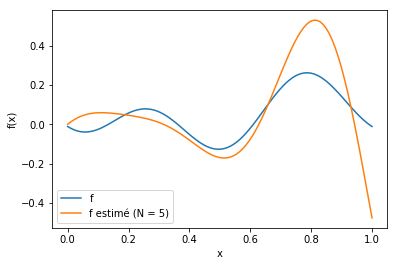

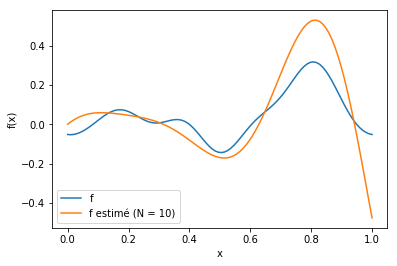

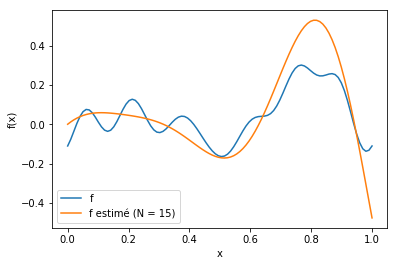

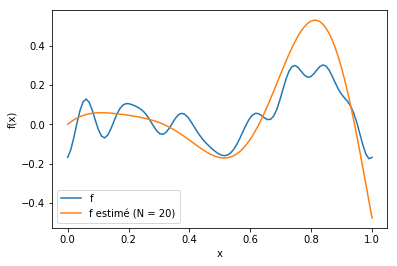

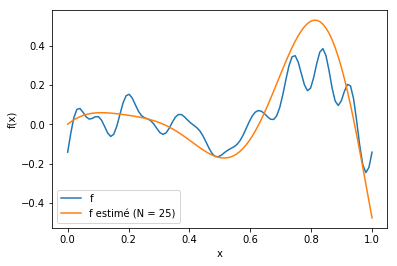

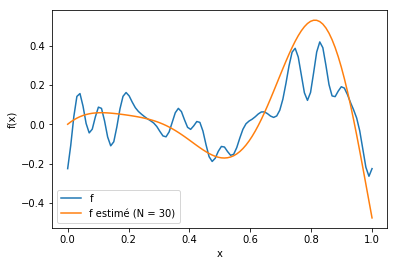

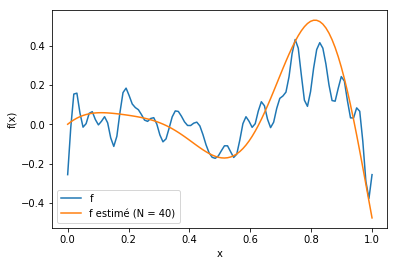

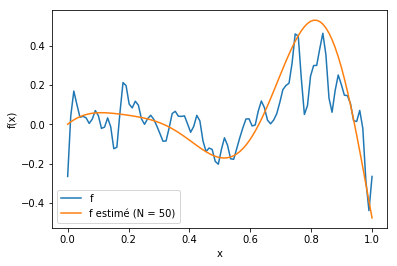

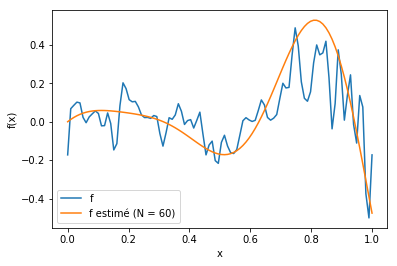

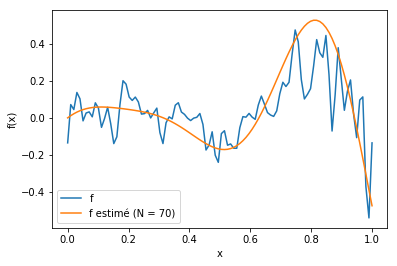

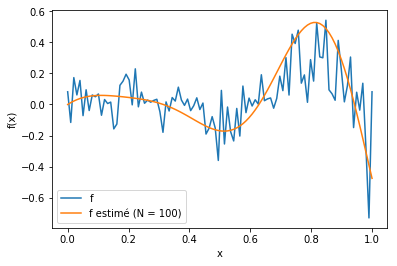

In [16]:
N_list = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 100]
for i_N, N in enumerate(N_list):
    legend_list = list()
    plt.figure()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    one_f_chap = f_chap_list(X, Y, N)
    plt.plot(np.linspace(0, 1, n), one_f_chap)
    plt.plot(np.linspace(0, 1, n), f_graph)
    
    legend_list.append("f")
    legend_list.append("f estimé (N = " + str(N) + ")")
    plt.legend(legend_list, loc="lower left")
    plt.show()

c)

On crée 5 "Blocs" de données, contenant aléatoirement des observations de notre base de données original (sans remises).
Les 5 blocs contiendront environ 100/5 = 20 données chacun

In [17]:
v = 5
n = len(Y)
base = [(X[i], Y[i]) for i in range(0, n)]
blocks = {"B" + str(i_v): list() for i_v in range(1, v + 1) }
for i_obs in range(0, n):
    rand_v = int(np.random.uniform(1, 6))
    blocks["B" + str(rand_v)].append(base[i_obs])

on se sert des Blocs crées pour estimer le paramètre de troncature "N" optimale pour l'estimation de la fonction de régression : 
$$\text{1) On itère sur chaque bloc } B_v \text{ de données : on récupère note base de données original, qu'on prive de } B_v \text{ à chaque itération}$$
$$\text{2) On calcul l'estimateur par projection, à chaque itération, sur la base privée de } B_v$$
$$\text{3) On calcul l'erreur de cet estimateur par projection, et on réitère l'opération pour chaque bloc } B_v \text{, obtenant ainsi autant d'erreur d'estimation qu'il y a de Blocs. Nous sommons ces erreurs d'estimation}$$
$$\text{on réitère les étapes 1 à 3 pour chaque paramètre N que l'on souhaite tester : le paramètre N optimale est celui donnant l'erreur d'estimation totale minimum}$$


In [18]:
CV_list = list()
for j in N_list:
    #test
    OPR = orthogonal_projection_regression()
    l_list = list()
    for v in range(1, 6):
        # étape 1 : calcul de l'estimateur sur Dn privé de Bv
        base_moins_v = [x for x in base if x not in blocks["B" + str(v)]]
        base_only_v = [x for x in base if x in blocks["B" + str(v)]]
        X_moins_v = [x[0] for x in base_moins_v]
        Y_moins_v = [x[1] for x in base_moins_v]
        X_only_v = [x[0] for x in base_only_v]
        Y_only_v = [x[1] for x in base_only_v]
        OPR.fit(X_moins_v, Y_moins_v, j)
        g_moins_v = OPR.f_chap
        # étape 2 : calcul de l'erreur sur Bv
        l = 0
        for x in base_only_v:
            l = l + np.power(x[1] - g_moins_v(x[0]), 2)
        l = l/len(base_moins_v)
        l_list.append(l)
    # étape 3 : calcul de l'erreur de validation croisée
    CV = np.sum(l_list)
    CV_list.append(CV)
# étape 4 : on trouve l'algo optimal
j_etoile = np.argmin(CV_list)
N_etoile = N_list[j_etoile]
# étape 5 : construction de l'estimateur final
f_chap_etoile = f_chap_list(X, Y, N_etoile)

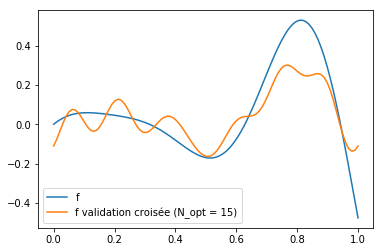

In [19]:
# on trace maintenant l'estimateur correspondant
plt.figure()
plt.plot(np.linspace(0, 1, n), f_graph)
plt.plot(np.linspace(0, 1, n), f_chap_etoile)
plt.legend(["f",
            "f validation croisée (N_opt = " + str(N_etoile) + ")"],
          loc="lower left")
plt.show()

4)

On reproduit maintenant les étapes 1 à 3, de la simulation de (X, Y) aléatoires jusqu'à l'estimation de la fonction de régression par validation croisée, et cela 200 fois, afin d'obtenir un histogramme des N optimaux

In [20]:
N_opt = list()

for i_try in range(1, 201):
    # Simulations de X et Y
    n = 100
    X = np.random.uniform(0, 1, n)
    eps = np.random.normal(0, 1, n)
    sigma = 0.2
    Y = [f(x) + sigma * eps[i_x] for i_x, x in enumerate(X)]

    # calcul du N optimal par validation croisée
    v = 5
    base = [(X[i], Y[i]) for i in range(0, n)]
    blocks = {"B" + str(i_v): list() for i_v in range(1, v + 1) }
    for i_obs in range(0, n):
        rand_v = int(np.random.uniform(1, 6))
        blocks["B" + str(rand_v)].append(base[i_obs])
    
    CV_list = list()
    for j in N_list:
        l_list = list()
        # test 
        OPR = orthogonal_projection_regression()        
        for v in range(1, 6):
            # étape 1 : calcul de l'estimateur sur Dn privé de Bv
            base_moins_v = [x for x in base if x not in blocks["B" + str(v)]]
            base_only_v = [x for x in base if x in blocks["B" + str(v)]]
            X_moins_v = [x[0] for x in base_moins_v]
            Y_moins_v = [x[1] for x in base_moins_v]
            X_only_v = [x[0] for x in base_only_v]
            Y_only_v = [x[1] for x in base_only_v]
            #test
            OPR.fit(X_moins_v, Y_moins_v, j)
            #g_moins_v = f_chap
            g_moins_v = OPR.f_chap
            # étape 2 : calcul de l'erreur sur Bv
            l = 0
            for x in base_only_v:
                l = l + np.power(x[1] - g_moins_v(x[0]), 2)
            l = l/len(base_moins_v)
            l_list.append(l)
        # étape 3 : calcul de l'erreur de validation croisée
        CV = np.sum(l_list)
        CV_list.append(CV)
    # étape 4 : on trouve l'algo optimal
    j_etoile = np.argmin(CV_list)
    N_etoile = N_list[j_etoile]
    # étape 5 : construction de l'estimateur final
    f_chap_etoile = f_chap_list(X, Y, N_etoile)
    
    # N Optimale pour 1 simulation
    N_opt.append(N_etoile)

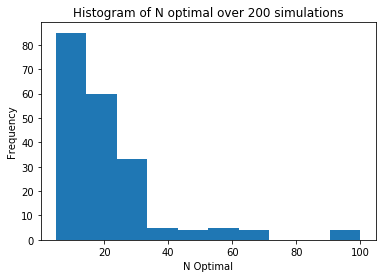

N* = 20


In [21]:
# on affiche l'historique des N optimaux sur nos 200 simulations 
plt.figure()
plt.title("Histogram of N optimal over 200 simulations")
plt.xlabel("N Optimal")
plt.ylabel("Frequency")
plt.hist(N_opt)
plt.show()

N_star = int(np.mean(N_opt))
print("N* = " + str(N_star))

Affichage graphique de l'estimateur final optimisé sur 200 simulations

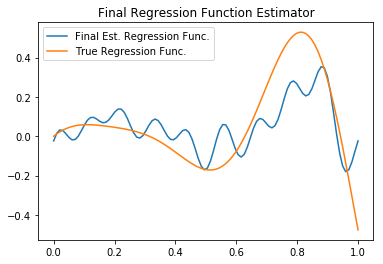

In [22]:
plt.figure()
plt.title("Final Regression Function Estimator")
plt.xlabel("")
plt.ylabel("")
plt.plot(np.linspace(0, 1, n), f_chap_list(X, Y, N_star))
plt.plot(np.linspace(0, 1, n), f_graph)
plt.legend(["Final Est. Regression Func.", "True Regression Func."])
plt.show()

## Exercice 2)

Dans cette partie, nous appliquons les résultats de la partie 1 à une "vraie" base de données.
Nous utiliserons une base de données issu du site UCI-machine learning.
Celle-ci présente la consommation de véhicules en fonction de certains paramètres.
Ici nous nous interressons à la réparation de la consammation d'essence (gas consumption) en fonction de la puissance du moteur (Horse power).

In [23]:
data = pd.read_excel("./Projet2-RealData.xlsx")
data.head(30)

,gas_consumption,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190,3850,8.5,70,1,"""amc ambassador dpl"""


In [24]:
# On supprime la colonne "car name"
clean_data = data[data.columns[:-1]]
# Il y a quelques valeurs manquantes dans le dataset : on supprime toutes les entrées qui 
# ne contiennent pas exclusivement des nombres
data_is_real = clean_data.applymap(np.isreal)
clean_data = clean_data[data_is_real]
clean_data = clean_data.dropna()
clean_data = clean_data.reset_index(drop=True)
# Re-Scaling des données pour qu'elles soient entre 0 et 1
# On utilise un Scaling Min-Max
clean_data = clean_data.apply(lambda x: (x - min(x))/(max(x) - min(x)) )

clean_data.head(30)

,gas_consumption,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.000000,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.000000,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.000000,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.000000,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.000000,0.0
5,0.159574,1.0,0.932817,0.826087,0.773462,0.119048,0.000000,0.0
6,0.132979,1.0,0.997416,0.945652,0.777148,0.059524,0.000000,0.0
7,0.132979,1.0,0.961240,0.918478,0.765240,0.029762,0.000000,0.0
8,0.132979,1.0,1.000000,0.972826,0.797278,0.119048,0.000000,0.0
9,0.159574,1.0,0.832041,0.782609,0.634250,0.029762,0.000000,0.0


In [25]:
# Maintenant que nos données sont préparées,
# on peut estimer la fonction de régression des X sur Y
Y = clean_data["gas_consumption"]
X = clean_data[clean_data.columns[clean_data.columns != "gas_consumption"]]

# Ici, X est dans R^8
# Dans l'exercice 1, X était dans R^1
# Afin de suivre la méthode utilisée dans l'exercice 1, nous prenons une colonne parmi
# les X, afin d'avoir X dans R^1.
# On prend évidemment une variable que nous penson pouvoir expliquer en partie la consommation
# d'essence
# Nous décidons de prendre la puissance du moter : la colonne horsepower
X = clean_data["horsepower"]

In [26]:
sorted_data = clean_data.sort_values(by="horsepower")
sorted_data.head(10)

,gas_consumption,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,0.452128,0.2,0.074935,0.000000,0.062943,0.744048,0.000000,0.5
101,0.452128,0.2,0.074935,0.000000,0.095549,0.773810,0.250000,0.5
324,0.914894,0.2,0.056848,0.010870,0.204707,0.934524,0.833333,0.5
323,0.938830,0.2,0.056848,0.010870,0.133825,0.815476,0.833333,0.5
242,0.906915,0.2,0.056848,0.010870,0.105472,0.803571,0.666667,0.5
116,0.531915,0.2,0.000000,0.016304,0.072016,0.684524,0.250000,0.5
193,0.531915,0.2,0.043928,0.032609,0.119648,0.845238,0.500000,0.0
244,0.632979,0.2,0.025840,0.032609,0.105472,0.678571,0.666667,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.000000,0.5
142,0.585106,0.2,0.020672,0.032609,0.010207,0.505952,0.333333,1.0


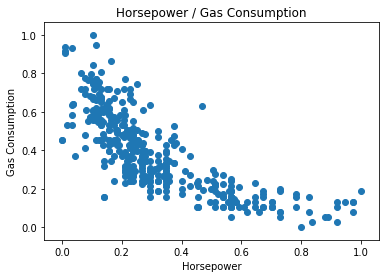

In [27]:
plt.figure()
plt.scatter(X, Y)
plt.title("Horsepower / Gas Consumption")
plt.xlabel("Horsepower")
plt.ylabel("Gas Consumption")
plt.show()

In [28]:
# Estimation par projection, même méthode que dans l'exercice 1 :
# - Estimation du N optimal par validation croisée
# - Construction de l'estimateur final

N_list = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 100]

# calcul du N optimal par validation croisée
n = len(Y)
v = 5
base = [(X[i], Y[i]) for i in range(0, n)]
blocks = {"B" + str(i_v): list() for i_v in range(1, v + 1) }
for i_obs in range(0, n):
    rand_v = int(np.random.uniform(1, 6))
    blocks["B" + str(rand_v)].append(base[i_obs])
    
CV_list = list()
for j in N_list:
    # test 
    OPR = orthogonal_projection_regression() 
    l_list = list()
    for v in range(1, 6):
        # étape 1 : calcul de l'estimateur sur Dn privé de Bv
        base_moins_v = [x for x in base if x not in blocks["B" + str(v)]]
        base_only_v = [x for x in base if x in blocks["B" + str(v)]]
        X_moins_v = [x[0] for x in base_moins_v]
        Y_moins_v = [x[1] for x in base_moins_v]
        X_only_v = [x[0] for x in base_only_v]
        Y_only_v = [x[1] for x in base_only_v]
        OPR.fit(X_moins_v, Y_moins_v, j)
        g_moins_v = OPR.f_chap
        # étape 2 : calcul de l'erreur sur Bv
        l = 0
        for x in base_only_v:
            l = l + np.power(x[1] - g_moins_v(x[0]), 2)
        l = l/len(base_moins_v)
        l_list.append(l)
    # étape 3 : calcul de l'erreur de validation croisée
    CV = np.sum(l_list)
    CV_list.append(CV)
# étape 4 : on trouve l'algo optimal
j_etoile = np.argmin(CV_list)
N_etoile = N_list[j_etoile]
print("Valeur de N optimal trouvé: " + str(N_etoile))
# étape 5 : construction de l'estimateur final
f_chap_etoile = f_chap_list(X, Y, N_etoile)

Valeur de N optimal trouvé: 5


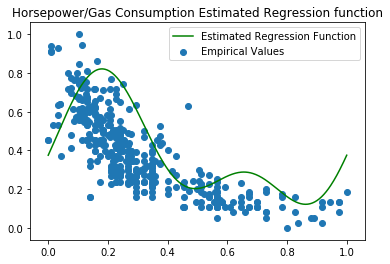

In [29]:
plt.figure()
plt.title("Horsepower/Gas Consumption Estimated Regression function")
plt.plot(np.linspace(0, 1, len(Y)), f_chap_etoile, "green")
plt.scatter(X, Y)
plt.legend(["Estimated Regression Function", "Empirical Values"])
plt.show()